### COFFEE RING EFFECT

Device connection

In [3]:
from cgi import test
from optparse import Values
from sqlite3 import Row
from time import time
import tkinter as tk
from tkinter import ttk
from turtle import width
import pyvisa
import time 
# import keyboard
import time
import cv2
from PIL import Image, ImageTk
from webbrowser import get
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import threading as th
import minimalmodbus
from skopt import Optimizer
from skopt.plots import plot_objective
from skopt.plots import plot_evaluations
# from simple_pid import PID
import os


system connection
before connect please check the com number in your device

In [39]:
rm = pyvisa.ResourceManager()
# usb connection name 
print(rm.list_resources()) 
# # connect the usb resource with python
# com_hv1 = rm.open_resource('ASRL13::INSTR')
# com_hv1.baud_rate = 9600
# com_hv2 = rm.open_resource('ASRL12::INSTR')
# # com_hv2.baud_rate = 9600
com_pxpy = rm.open_resource('ASRL5::INSTR')
com_pxpy.baud_rate = 921600
com_syr = rm.open_resource('ASRL4::INSTR')
com_syr.baud_rate = 115200
com_hot = minimalmodbus.Instrument('com13', 1, minimalmodbus.MODE_RTU)
com_hot.serial.baudrate = 115200

('ASRL4::INSTR', 'ASRL5::INSTR', 'ASRL13::INSTR')


camera check

In [77]:
cap = cv2.VideoCapture(1)

while True:
    # Read the current frame from the webcam
    ret, frame = cap.read()

    # Display the frame in a window named "Webcam"
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import Image
  
# get the image
Image(url="sample position.jpg", width=300, height=300)

Initial Position

In [57]:
com_pxpy.write('1MO')
com_pxpy.write('2MO')
initial_position_x = com_pxpy.query_ascii_values('1TP?')
initial_position_x = ''.join(str(element) for element in initial_position_x)
initial_position_y = com_pxpy.query_ascii_values('2TP?')
initial_position_y = ''.join(str(element) for element in initial_position_y)

Camera Position

In [66]:
camera_position_x = com_pxpy.query_ascii_values('1TP?')
camera_position_x = ''.join(str(element) for element in camera_position_x)
camera_position_y = com_pxpy.query_ascii_values('2TP?')
camera_position_y = ''.join(str(element) for element in camera_position_y)


dx=float(camera_position_x)-float(initial_position_x)
dy=float(camera_position_y)-float(initial_position_y)
dx,dy

(-53.04599999999999, -15.874499999999998)

Parameter selection

In [82]:
# parameter1 is ethanol concentration
Parameter1=[0,100]
# parameter2 is temperature of substrate
Parameter2=[30,70]

Flush position

In [43]:
flush_position_x = com_pxpy.query_ascii_values('1TP?')
flush_position_x = ''.join(str(element) for element in flush_position_x)
flush_position_y = com_pxpy.query_ascii_values('2TP?')
flush_position_y = ''.join(str(element) for element in flush_position_y)

Flush

In [71]:
def flush(sample1_volume,sample2_volume):
#     move to flush position
    com_pxpy.write('1PA'+flush_position_x)
    com_pxpy.write('2PA'+flush_position_y)
#     infuse flow

    com_syr.write('0svolume 5 ml')
    time.sleep(0.1)
    com_syr.write('0diameter '+str(sy_dia))
    time.sleep(0.1)
    com_syr.write('0irate '+str(sample1_volume) +' ul/min')
    time.sleep(0.1)
    com_syr.write('0tvolume '+str(3*sample1_volume)+' ul')
    time.sleep(0.1)
    com_syr.write('0irun')
    time.sleep(0.2)

    
    com_syr.write('2svolume 5 ml')
    time.sleep(0.1)
    com_syr.write('2diameter '+str(sy_dia))
    time.sleep(0.1)
    com_syr.write('2irate '+str(sample2_volume) +' ul/min')
    time.sleep(0.1)
    com_syr.write('2tvolume '+str(3*sample2_volume)+ ' ul')
    time.sleep(0.1)
    com_syr.write('2irun')
    time.sleep(0.1)


In [ ]:
# com_syr.write('2svolume 5 ml')
# com_syr.write('2diameter 8.6')
# com_syr.write('2irate 10 ul/min')
# com_syr.write('2tvolume 10 ul')
com_syr.write('2irun')

In [16]:
com_syr.write('2stop')
com_syr.write('0stop')

7

In [52]:
flo=float(70)
com_hot.write_float(548,flo)

In [50]:
set_temp=30
current_temperature=com_hot.read_float(528)
set_temp-current_temperature>1

False

In [73]:
flush(3,3)

In [ ]:
sample2_volume=400
sy_dia=8.66

com_syr.write('2svolume 5 ml')
time.sleep(0.1)
com_syr.write('2diameter '+str(sy_dia))
time.sleep(0.1)
com_syr.write('2irate '+str(sample2_volume) +' ul/min')
time.sleep(0.1)
com_syr.write('2tvolume '+str(400)+ ' ul')
time.sleep(0.1)
com_syr.write('2irun')

In [ ]:
sample1_volume=200
2*sample1_volume

In [ ]:
com_syr.write('2stop')

Capture Image and Save

In [2]:
def capture_and_save_image(image_name):
    save_path = "image"  # Specify the directory where you want to save the images
    
    cap = cv2.VideoCapture(1)
      # Capture frame from the camera
    ret, frame = cap.read()
     # Save the captured frame with the specified name
    image_path = f"{save_path}/{image_name}.jpg"
    cv2.imwrite(image_path, frame)
    # Release the camera
    cap.release()
#     print(f"Image saved successfully at: {image_path}")
    
    # Display the captured image
#     cv2.imshow("Captured Image", frame)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

#     image_name = "iteration"+i  # Specify the name of the image (without extension)

Image processing

In [101]:
def process_image(image_path):
    # Read the image from the specified path
    image = cv2.imread(image_path)
    
    
    height, width = image.shape[:2]
    crop_size = min(height, width) // 2
    center_x = width // 2
    center_y = height // 2
    x1 = center_x - crop_size 
    x2 = center_x + crop_size+200
    y1 = center_y - crop_size
    y2 = center_y + crop_size
    cropped_image = image[y1:y2, x1:x2]
   

   # Convert the cropped image to the LAB color space
    lab_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2LAB)

    # Split LAB image channels
    l_channel, _, _ = cv2.split(lab_image)

    # Apply adaptive thresholding to the L channel
    _, threshold = cv2.threshold(l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours of white areas
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for white areas
    mask = np.zeros_like(cropped_image)
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the cropped image
    result = cv2.bitwise_and(cropped_image, mask)

    # Convert the result to grayscale
    gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

    # Display the original image and the result
    cv2.imshow("Original Image", image)
    cv2.imshow("White Areas", gray_result)
    cv2.waitKey(0)  # Wait for any key press to close the image windows
    cv2.destroyAllWindows()  # Close all the opened image windows

    # Calculate the total area of white areas
    white_area = cv2.countNonZero(gray_result)

    return white_area

Initial Condition

In [68]:
maximum_iteration=3
sample_distance=10
total_volume=5
file_path="image"
sy_dia=8.66
evaporation_time=1800
dispense_time=10
flush=10

Bayesian optimization

In [83]:
opt = Optimizer([Parameter1,Parameter2], "GP", acq_func='EI',
                acq_optimizer="sampling",initial_point_generator="lhs",
                n_initial_points=1)

Start Optimizing with bayesian optimization

In [ ]:
for i in range(2,30):
    print(f'{i}iteration')
#     sample position divide
    a,b=divmod(i,7)
    position_x=str(float(initial_position_x)+(sample_distance*int(b-1)))
    position_y=str(float(initial_position_y)-(sample_distance*int(a)))
    

#     flow rate determine
    next_x = np.round(opt.ask(),1).tolist()
    sample1_volume=total_volume*(100-next_x[0])/100
    sample1_flowrate=sample1_volume/60   
    sample2_volume=total_volume*(next_x[0])/100
    sample2_flowrate=sample2_volume/60   
#     temperature set  
    set_temp=next_x[1]
    flo=float(set_temp)
    com_hot.write_float(548,flo)
    current_temp=com_hot.read_float(528)
    
    print(f'parameter:{sample1_volume,sample2_volume,set_temp}')
    
    
    
    while abs(current_temp-set_temp)>=1:
            time.sleep(30)
            print('waiting temperature')
            current_temp=com_hot.read_float(528)

#      move to flush
    flush(sample1_volume,sample2_volume)
    print('flush')
    time.sleep(180)
    
      
#     move to new position      
    com_pxpy.write('1PA'+ position_x)
    com_pxpy.write('2PA'+ position_y)
    time.sleep(5)
        
#     infuse to new position
    com_syr.write('0svolume 5 ml')
    time.sleep(0.2)
    com_syr.write('0diameter '+str(sy_dia))
    time.sleep(0.2)
    com_syr.write('0irate '+str(sample1_volume) +' ul/min')
    time.sleep(0.2)
    com_syr.write('0tvolume '+str(sample1_volume)+' ul')
    time.sleep(0.2)        
    com_syr.write('2svolume 5 ml')
    time.sleep(0.2)
    com_syr.write('2diameter '+str(sy_dia))
    time.sleep(0.2)
    com_syr.write('2irate '+str(sample2_volume) +' ul/min')
    time.sleep(0.2)
    com_syr.write('2tvolume '+str(sample2_volume)+ ' ul')
    time.sleep(0.2)
    
    com_syr.write('0irun')
    time.sleep(0.2)
    com_syr.write('2irun')
    time.sleep(60)
    
    
# Move to camera

    com_pxpy.write('1PR'+ str(dx))
    com_pxpy.write('2PR'+ str(dy))

#  evaporation time
    print('evaporation')
    time.sleep((-0.5*set_temp+45)*60)
    
    
#    capturing and image processing
    
    capture_and_save_image(i)
    time.sleep(10)
    edge_area=process_image('image/{}.jpg'.format(i))      
    time.sleep(2)
#     tell to bayesian optimization    
    f_val = -edge_area
    print(f'result:{f_val}')
    res = opt.tell(next_x, f_val)
    print(f'finish {i}iteration')

2iteration
parameter:(1.5, 3.5, 56)
waiting temperature
waiting temperature
waiting temperature
waiting temperature
flush
evaporation
result:-8972
finish 2iteration
3iteration
parameter:(4.95, 0.05, 30)
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperature
waiting temperatu

### System check

In [ ]:
com_pxpy.write('1PA'+ initial_position_x)
com_pxpy.write('2PA'+ initial_position_y)

In [ ]:
com_pxpy.write('1PA'+ camera_position_x)
com_pxpy.write('2PA'+ camera_position_y)

In [136]:
# capture_and_save_image(1)
# time.sleep(10)
edge_area=process_image('image/{}.jpg'.format(2))      
edge_area

12521

In [80]:
(-0.5*set_temp+45)*60

1530.0

In [75]:
sample1_volume=2.5
sample2_volume=2.5
com_syr.write('0svolume 5 ml')
time.sleep(0.2)
com_syr.write('0diameter '+str(sy_dia))
time.sleep(0.2)
com_syr.write('0irate '+str(sample1_volume) +' ul/min')
time.sleep(0.2)
com_syr.write('0tvolume '+str(sample1_volume)+' ul')
time.sleep(0.2)        
com_syr.write('2svolume 5 ml')
time.sleep(0.2)
com_syr.write('2diameter '+str(sy_dia))
time.sleep(0.2)
com_syr.write('2irate '+str(sample2_volume) +' ul/min')
time.sleep(0.2)
com_syr.write('2tvolume '+str(sample2_volume)+ ' ul')
time.sleep(0.2)
    
com_syr.write('0irun')
time.sleep(0.2)
com_syr.write('2irun')


7

In [103]:
cap = cv2.VideoCapture(1)

while True:
    # Read the current frame from the webcam
    ret, frame = cap.read()

    # Display the frame in a window named "Webcam"
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import pandas as pd
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import train_test_split
from numpy import hstack
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import Matern

In [9]:
df = pd.read_excel('output0602_50.xlsx', engine='openpyxl')
x1 = df.drop(['area'], axis=1)

# set y = diameter
y1=df['y']
z1=df['area']
# split the data for train and test
# trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [6]:
# kernel = DotProduct() + WhiteKernel()
kernel = 1.0 * Matern(length_scale=10.0, nu=1)
# kernel =1*RBF(10.0)
# kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel).fit(x1,z1)
gpr.score(x1, z1)

C:\Users\minki lee\AppData\Roaming\Python\Python39\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\minki lee\AppData\Roaming\Python\Python39\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


0.9922245355544936

In [230]:
np.array(x1)[:,0]

array([57,  3, 27, 97, 78, 28, 65, 20, 24, 31, 93, 31, 34, 26, 26, 26, 27,
       99, 95, 27, 97, 97, 20, 31, 29, 29, 31, 27,  8], dtype=int64)

In [236]:
gpr.predict([[29,69]])


C:\Users\minki lee\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


array([-6120.99804688])

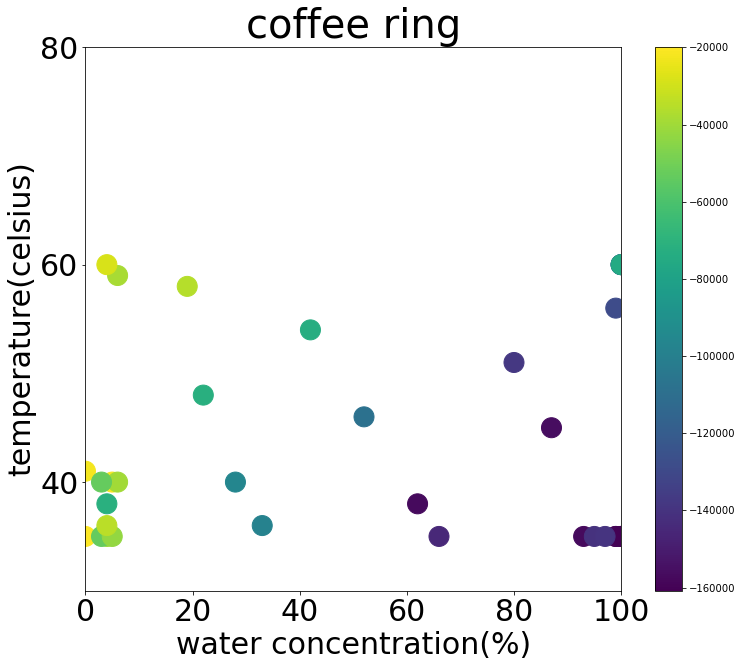

In [10]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12, 10))
sc = ax.scatter(np.array(x1)[:,0], np.array(x1)[:,1], s=400, c=np.array(z1), cmap="viridis")
ax.set_title("coffee ring", fontsize=40)
ax.set_xlabel("water concentration(%)", fontsize=30)
ax.set_ylabel("temperature(celsius)", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# cbar = fig.colorbar(sc)
cbar = fig.colorbar(sc, spacing='proportional')
ax.set_xlim(0, 100)  # set x-axis limits
ax.set_ylim(30, 80)  # set y-axis limits
ax.yaxis.set_major_locator(MultipleLocator(20))  # set y-axis tick interval to 20
plt.show()

C:\Users\minki lee\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


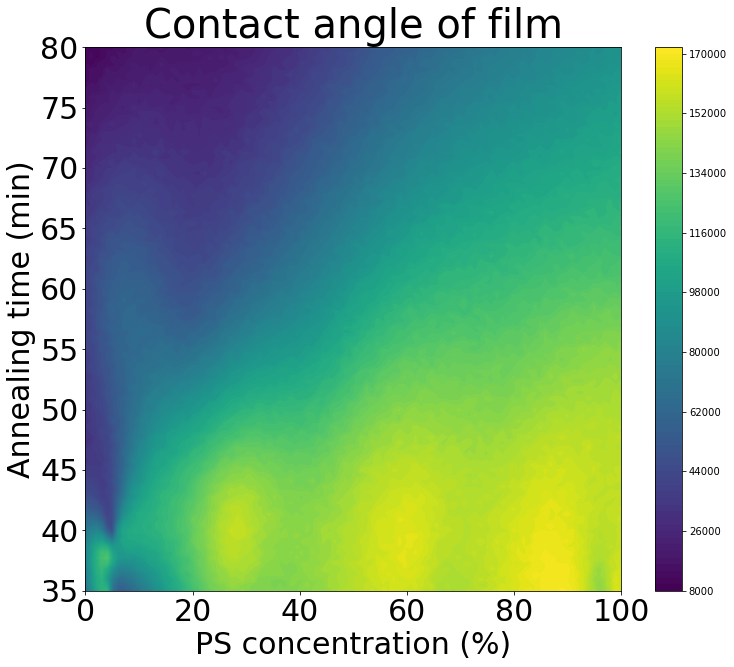

In [8]:
xlist = np.linspace(0, 100, 100)
ylist = np.linspace(35, 80, 100)

xx,yy=np.meshgrid(xlist,ylist)
r1, r2 = xx.flatten(), yy.flatten()

r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))



grid = hstack((r1,r2))
ss_pred = gpr.predict(grid)

zz = ss_pred.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(12, 10))
cs = ax.contourf(xlist, ylist, zz, 100,
                  
                  cmap ="viridis")
# plt.scatter(np.array(x1)[:,0],np.array(x1)[:,1], 400, c=np.array(y1),cmap ="viridis")

cbar = plt.colorbar(cs)
# cbar.ax.locator_params(nbins=5)
# cbar.ax.tick_params(labelsize=15)

plt.xlabel('PS concentration (%)', fontsize=30)
plt.ylabel('Annealing time (min)', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Contact angle of film',fontsize=40)
plt.show()